In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Tesla_df =pd.read_csv('Tesla - Deaths.csv')
Tesla_df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


In [ ]:
Tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    float64
 7  

In [ ]:
Tesla_df.describe()

,Case #,Year,Deaths,Deceased 4
count,294.000000,294.000000,299.000000,0.0
mean,147.500000,2013.850340,10.284281,NaN
std,85.014705,106.050207,119.032014,NaN
min,1.000000,202.000000,1.000000,NaN
25%,74.250000,2019.000000,1.000000,NaN
50%,147.500000,2021.000000,1.000000,NaN
75%,220.750000,2022.000000,1.000000,NaN
max,294.000000,2022.000000,2013.000000,NaN


# ***Exploratory Data Analysis***

In [ ]:
# Deleting the columns which are not relevant for analysis
Tesla_df.drop(columns = ['Case #','Year','Unnamed: 16','Unnamed: 17',' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '], inplace = True)

In [ ]:
Tesla_df.columns

Index(['Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '],
      dtype='object')

In [ ]:
Tesla_df.isna().sum()

,0
Date,13
Country,13
State,13
Description,12
Deaths,8
Tesla driver,13
Tesla occupant,17
Other vehicle,12
Cyclists/ Peds,11
TSLA+cycl / peds,10


In [ ]:
Tesla_df[' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '].value_counts(dropna = False)

,count
Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,
-,269
1,21
NaN,11
2,3
3,1
24,1
27,1


As '-' indicates blank space hence dropping this column also.

In [ ]:
Tesla_df.drop(columns = [' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '], inplace = True)

In [ ]:
Tesla_df

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Tesla_df.isna().sum()

,0
Date,13
Country,13
State,13
Description,12
Deaths,8
Tesla driver,13
Tesla occupant,17
Other vehicle,12
Cyclists/ Peds,11
TSLA+cycl / peds,10


In [ ]:
# Handling missing values

Tesla_df.head(15)

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-
5,12/18/2022,USA,CA,Tesla hit two other cars,1.0,-,1,-,-,-,-,-,-
6,12/17/2022,USA,CA,Tesla hits pedestrian on highway,1.0,-,-,-,1,1,-,-,-
7,12/11/2022,USA,CA,Tesla crashes into wall,1.0,1,-,-,-,-,-,-,-
8,12/11/2022,USA,MO,Collision at intersection,1.0,-,-,1,-,-,-,-,-
9,12/6/2022,Canada,-,"Tesla veers, collides with truck",1.0,1,-,-,-,-,-,-,-


In [ ]:
# Replacing all null values with '-' and Converting all the '-' values to 0

cols = Tesla_df.columns[5:]
for col in cols:
  if col != ' Model ':
    print(col)
    Tesla_df[col] = Tesla_df[col].fillna("-")
    Tesla_df[col] = Tesla_df[col].str.strip()
    Tesla_df[col] = Tesla_df[col].replace("-", "0")
    Tesla_df[col] = Tesla_df[col].astype(int)
    print(Tesla_df[col].unique())


 Tesla driver 
[   1    0   28   89  117    6 2014]
 Tesla occupant 
[   0    1    3    2    7   41   48    5 2015]
 Other vehicle 
[   0    1    2    3    4   29  101  130   16 2016]
 Cyclists/ Peds 
[   0    1    2   20   26   46   11 2017]
 TSLA+cycl / peds 
[   1    0    2    3    4   61  149  210   21 2018]
 Autopilot claimed 
[   0    1    2    8   30   38   47 2020]
 Verified Tesla Autopilot Deaths 
[   0    1    2    3   16   19  118 2022   75 2021]


In [ ]:
Tesla_df.isna().sum()

,0
Date,13
Country,13
State,13
Description,12
Deaths,8
Tesla driver,0
Tesla occupant,0
Other vehicle,0
Cyclists/ Peds,0
TSLA+cycl / peds,0


In [ ]:
Tesla_df.dropna(inplace=True)

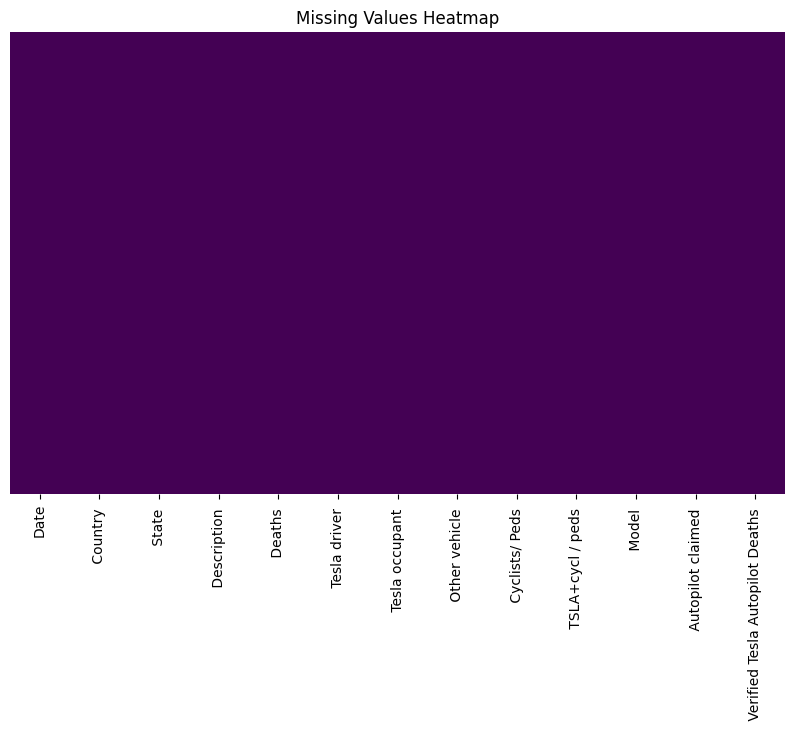

In [ ]:
# Visual representation to check if there are any missing values


plt.figure(figsize=(10, 6))
sns.heatmap(Tesla_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tick_params( left = False,labelleft = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Standardising the column names

Tesla_df.columns = Tesla_df.columns.str.strip()

Tesla_df.columns = Tesla_df.columns.str.replace(" ", "_", regex = True).str.replace("[+/]","_",regex = True)

Tesla_df.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla_driver',
       'Tesla_occupant', 'Other_vehicle', 'Cyclists__Peds', 'TSLA_cycl___peds',
       'Model', 'Autopilot_claimed', 'Verified_Tesla_Autopilot_Deaths'],
      dtype='object')

In [ ]:
Tesla_df['Date']=pd.to_datetime(Tesla_df['Date'])
Tesla_df['Date']

,Date
0,2023-01-17
1,2023-01-07
2,2023-01-07
3,2022-12-22
4,2022-12-19
...,...
289,2014-07-14
290,2014-07-04
291,2014-07-04
292,2013-11-02


In [ ]:
Tesla_df['Year']= Tesla_df['Date'].dt.year
Tesla_df['Year']

,Year
0,2023
1,2023
2,2023
3,2022
4,2022
...,...
289,2014
290,2014
291,2014
292,2013


In [ ]:
Tesla_df['Month']= Tesla_df['Date'].dt.month
Tesla_df['Month']

,Month
0,1
1,1
2,1
3,12
4,12
...,...
289,7
290,7
291,7
292,11


In [ ]:
Tesla_df['Day']= Tesla_df['Date'].dt.day_name()
Tesla_df['Day']

,Day
0,Tuesday
1,Saturday
2,Saturday
3,Thursday
4,Monday
...,...
289,Monday
290,Friday
291,Friday
292,Saturday


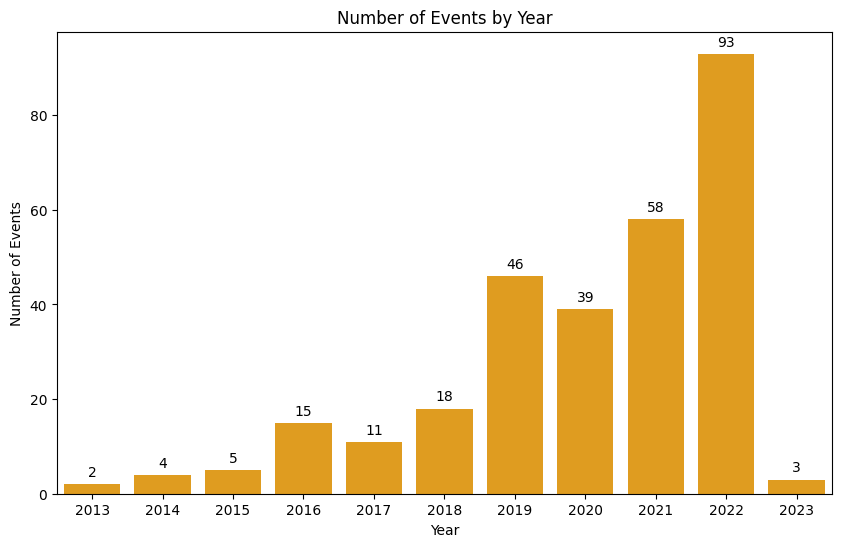

In [ ]:
# Number of events by year

events_year = Tesla_df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=events_year.index, y=events_year.values,color='orange')

# Add y-values on top of the bars
for i, value in enumerate(events_year.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of Events by Year')

plt.show()

Text(0.5, 1.0, 'Number of Events by day')

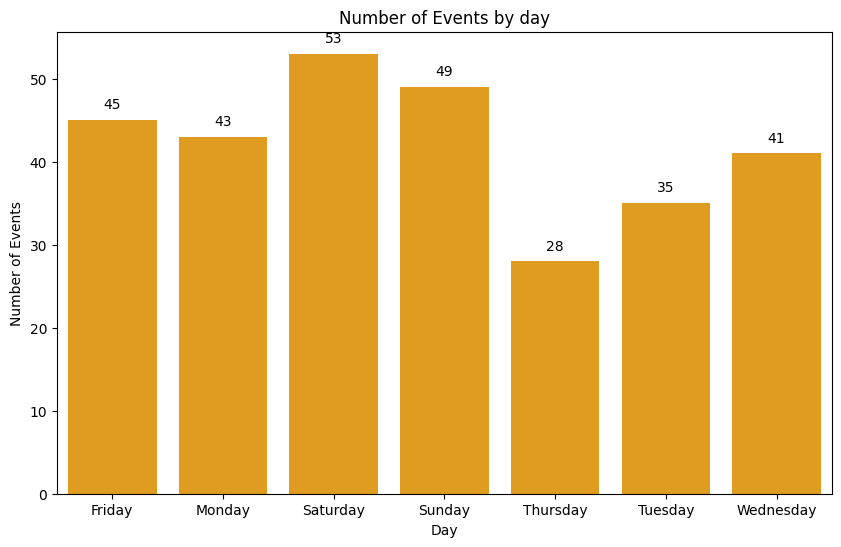

In [ ]:
# Number of events by day


events_day = Tesla_df['Day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=events_day.index, y=events_day.values,color='orange')

# Add y-values on top of the bars
for i, value in enumerate(events_day.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Day')
plt.ylabel('Number of Events')
plt.title('Number of Events by day')

Text(0.5, 1.0, 'Number of Events by month')

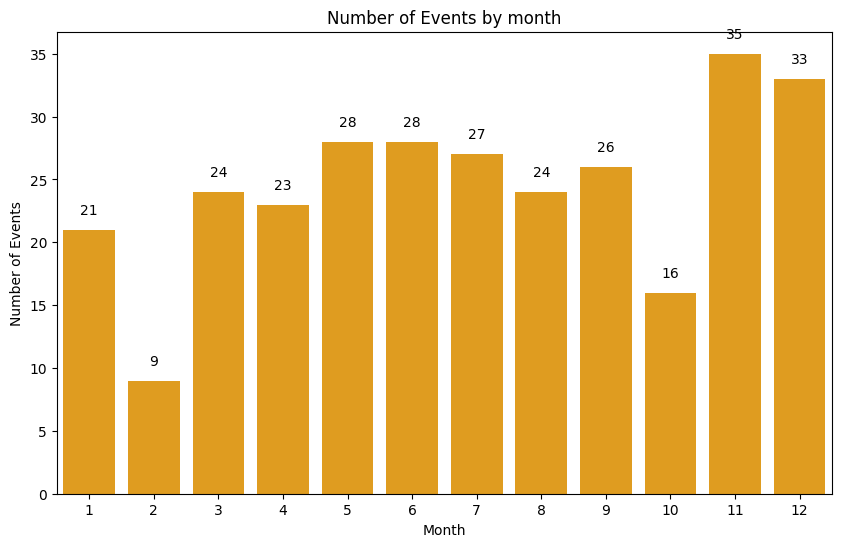

In [ ]:
# Number of events by month


events_month = Tesla_df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=events_month.index, y=events_month.values,color='orange')

# Add y-values on top of the bars
for i, value in enumerate(events_month.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.title('Number of Events by month')

Occurence of events increased year after year. Also more events has happened on Saturdays


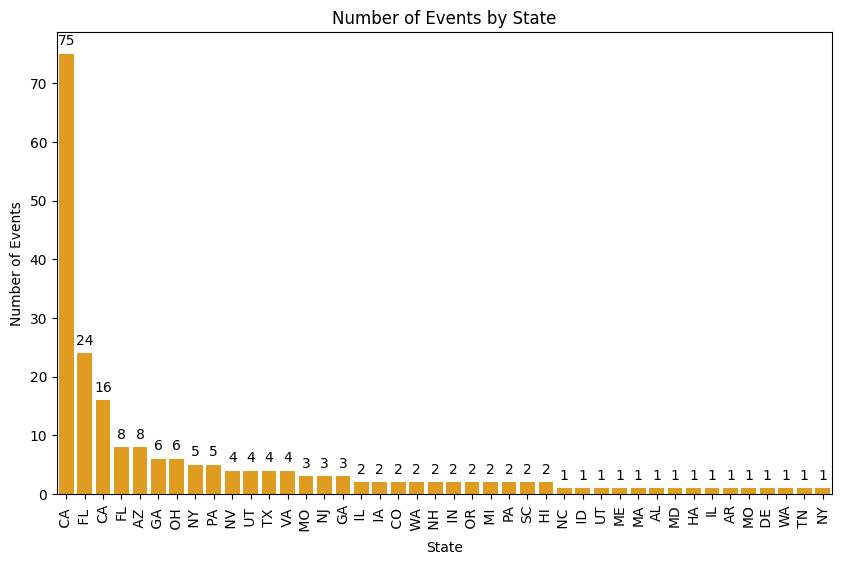

In [ ]:

# Occurence of events by state

events_state = Tesla_df['State'].value_counts()
events_state = events_state[events_state.index != '-']
plt.figure(figsize=(10, 6))
sns.barplot(x=events_state.index, y=events_state.values,color='orange')

# Add y-values on top of the bars
for i, value in enumerate(events_state.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Number of Events')
plt.title('Number of Events by State')
plt.show()



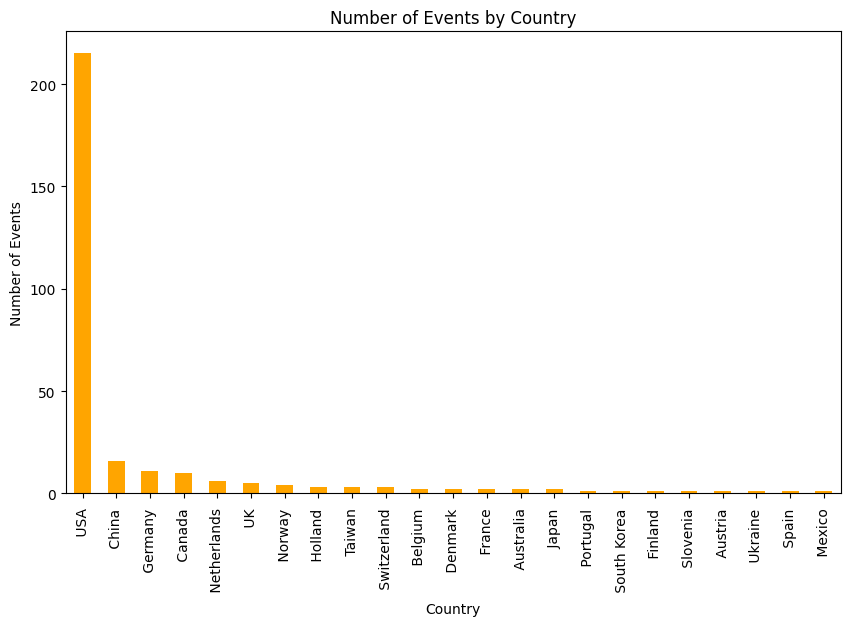

In [ ]:
# Occurence of events by country


plt.figure(figsize=(10, 6))
Tesla_df['Country'].value_counts().plot(kind='bar',color='orange')

plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Events')
plt.title('Number of Events by Country')
plt.show()

Maximum events has occured in USA, California

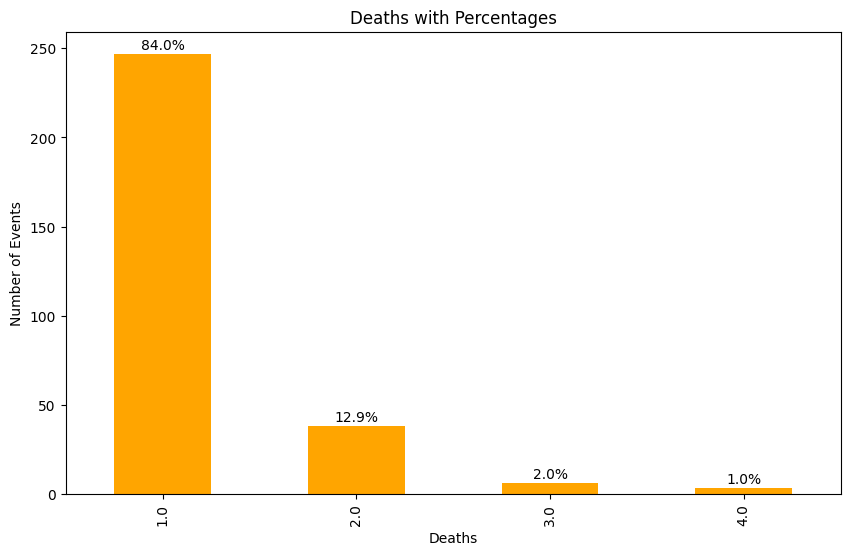

In [ ]:
# No of victims in the accidents

# Count the occurrences
collision_counts = Tesla_df['Deaths'].value_counts()

# Calculate percentages
total = collision_counts.sum()
percentages = (collision_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = collision_counts.plot(kind='bar',color='orange')

# Add percentage labels on top of the bars
for i, value in enumerate(collision_counts):
    plt.text(i, value + 1, f"{percentages.iloc[i]:.1f}%", ha='center', va='bottom')

plt.xlabel('Deaths')
plt.xticks(rotation=90)
plt.ylabel('Number of Events')
plt.title('Deaths with Percentages')
plt.show()



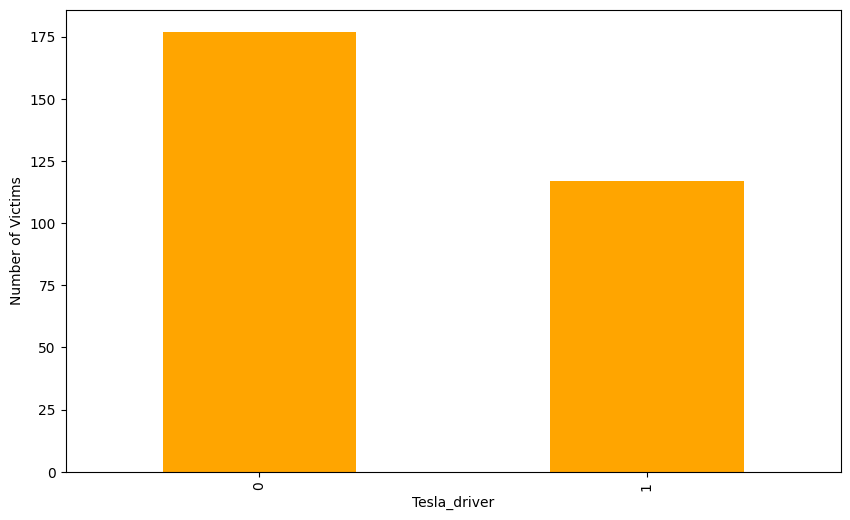

In [ ]:
# No of times Tesla driver is a victim

plt.figure(figsize=(10, 6))
Tesla_df['Tesla_driver'].value_counts().plot(kind='bar',color='orange')

plt.xlabel('Tesla_driver')
plt.xticks(rotation=90)
plt.ylabel('Number of Victims')
plt.show()

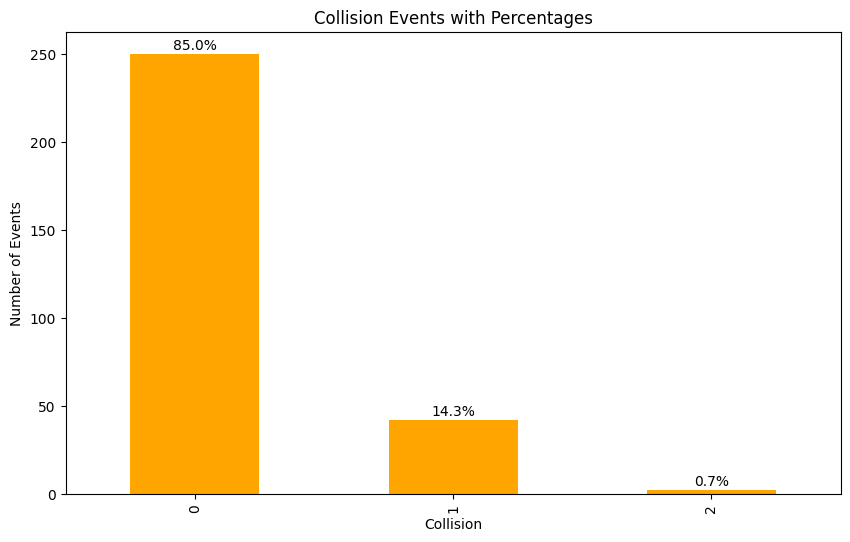

In [ ]:
# Distribution of events in which Tesla has collided with cycle or pedestrain

# Count the occurrences
collision_counts = Tesla_df['Cyclists__Peds'].value_counts()

# Calculate percentages
total = collision_counts.sum()
percentages = (collision_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = collision_counts.plot(kind='bar',color='orange')

# Add percentage labels on top of the bars
for i, value in enumerate(collision_counts):
    plt.text(i, value + 1, f"{percentages.iloc[i]:.1f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Collision')
plt.xticks(rotation=90)
plt.ylabel('Number of Events')
plt.title('Collision Events with Percentages')
plt.show()

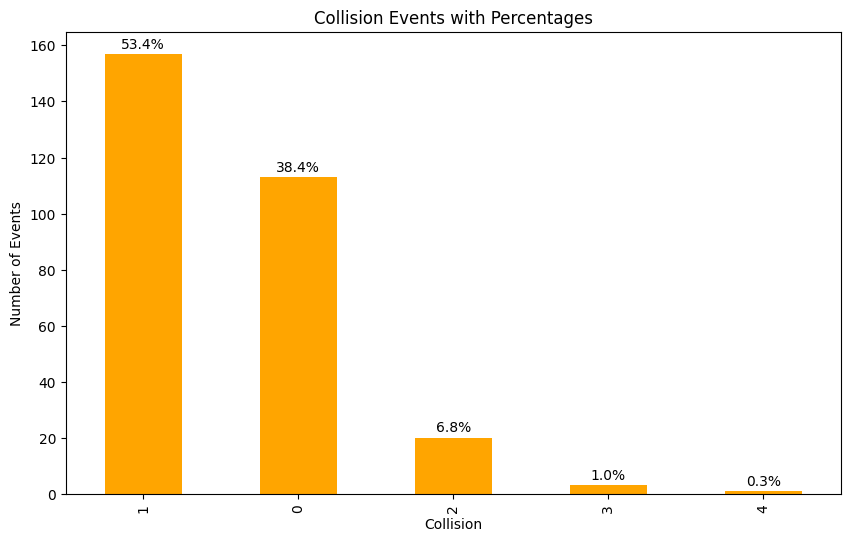

In [ ]:
# Count the occurrences
collision_counts = Tesla_df['TSLA_cycl___peds'].value_counts()

# Calculate percentages
total = collision_counts.sum()
percentages = (collision_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = collision_counts.plot(kind='bar',color='orange')

# Add percentage labels on top of the bars
for i, value in enumerate(collision_counts):
    plt.text(i, value + 1, f"{percentages.iloc[i]:.1f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Collision')
plt.xticks(rotation=90)
plt.ylabel('Number of Events')
plt.title('Collision Events with Percentages')
plt.show()

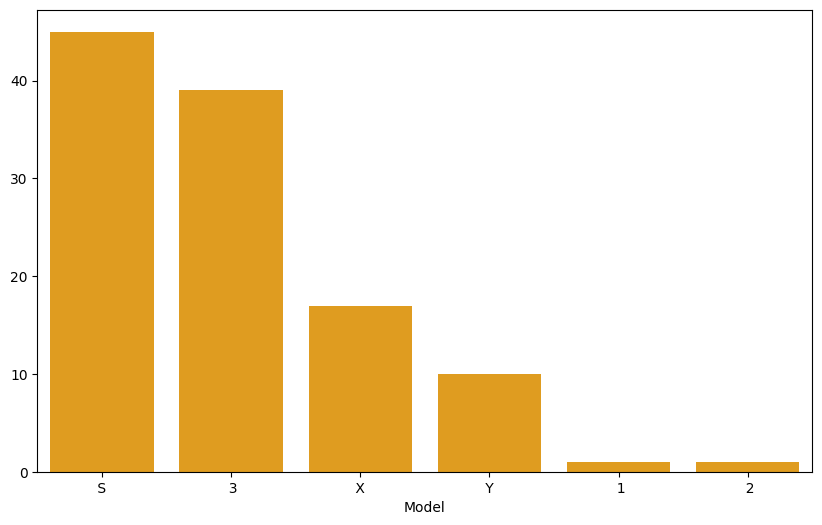

In [ ]:
event_model = Tesla_df['Model'].value_counts()
event_model = event_model[event_model.index != ' - ']
plt.figure(figsize=(10, 6))
sns.barplot(x=event_model.index, y=event_model.values, color='orange')
plt.show()

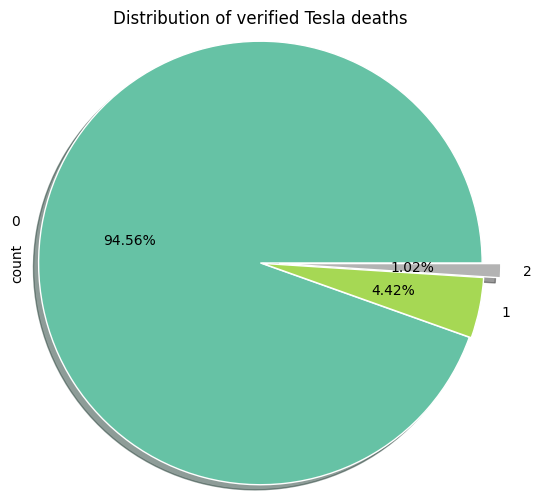

In [ ]:
# Distribution of verified Tesla deaths

plt.figure(figsize=(10, 6))
Tesla_df['Verified_Tesla_Autopilot_Deaths'].value_counts().plot.pie(radius = 1.2, autopct = "%1.2f%%", shadow = True, wedgeprops = {'edgecolor':"white"}, cmap = 'Set2',
            explode = [0.001, 0.01,0.1])

plt.title('Distribution of verified Tesla deaths')
plt.show()